In [2]:
import os
import cv2
from os import listdir
from os.path import isfile,join
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shutil
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import backend as K
from keras import layers, callbacks, regularizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.models import load_model

from keras.layers.experimental import preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img

In [3]:
img_width = 150
img_height = 150
train_data_dir = 'Downloads/dogs_vs_cats/train'
validation_data_dir = 'Downloads/dogs_vs_cats/validation'
train_samples = 120
validation_samples = 30
epochs = 5
batch_size = 10
if K.image_data_format() == 'channels first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])

In [5]:
train_datagen = ImageDataGenerator(
          rescale = 1./255,
          shear_range = 0.2,
           zoom_range = 0.2,
           horizontal_flip=True) 

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
         train_data_dir,
         target_size=(img_width, img_height),
         batch_size = batch_size,
         class_mode = 'binary')

Found 2002 images belonging to 2 classes.


In [8]:
print(train_generator.class_indices)

{'cat': 0, 'dog': 1}


In [9]:
imgs, labels = next(train_generator)

In [10]:
from skimage import io
def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

10
0.0


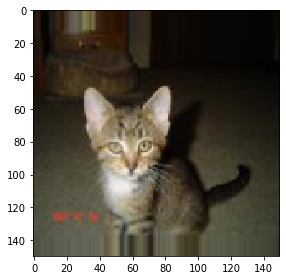

0.0


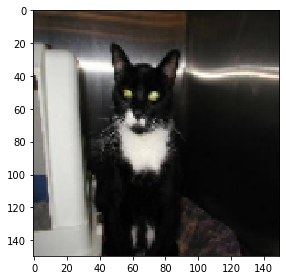

0.0


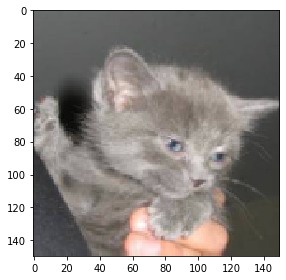

1.0


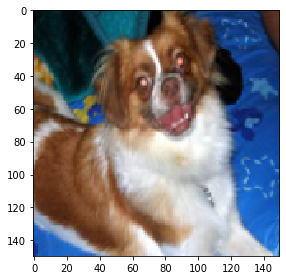

1.0


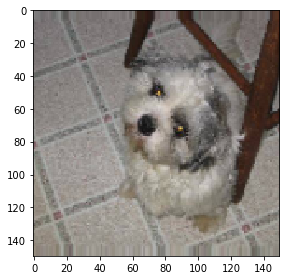

0.0


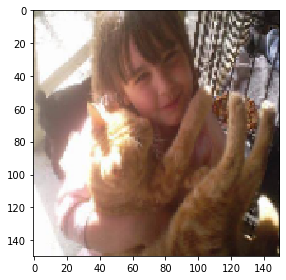

1.0


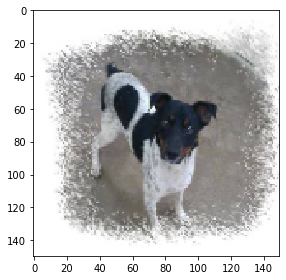

1.0


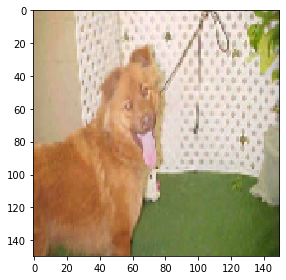

1.0


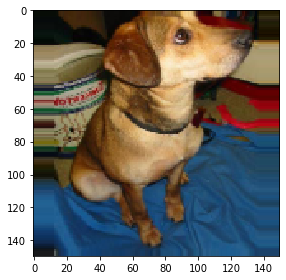

0.0


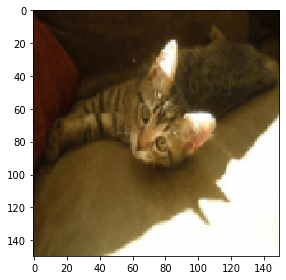

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch, label_batch = train_generator.next()
print(len(image_batch))
for i in range(0, len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [12]:
validation_generator = test_datagen.flow_from_directory(
         validation_data_dir,
         target_size=(img_width, img_height),
         batch_size = batch_size,
         class_mode = 'binary')

Found 1005 images belonging to 2 classes.


In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_samples,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_samples)

Epoch 1/5
120/120 [==============================] - 36s 301ms/step - loss: 5.9805e-08 - acc: 0.5101 - val_loss: 5.7618e-08 - val_acc: 0.4967
Epoch 2/5
120/120 [==============================] - 36s 299ms/step - loss: 5.9005e-08 - acc: 0.5151 - val_loss: 5.9207e-08 - val_acc: 0.5100
Epoch 3/5
120/120 [==============================] - 36s 299ms/step - loss: 6.1005e-08 - acc: 0.5084 - val_loss: 5.8015e-08 - val_acc: 0.4933
Epoch 4/5
120/120 [==============================] - 36s 300ms/step - loss: 5.6704e-08 - acc: 0.4983 - val_loss: 6.0797e-08 - val_acc: 0.5067
Epoch 5/5
120/120 [==============================] - 36s 296ms/step - loss: 5.8205e-08 - acc: 0.5050 - val_loss: 6.0797e-08 - val_acc: 0.5167


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


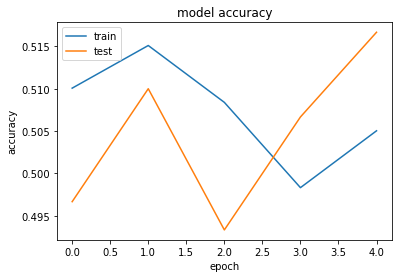

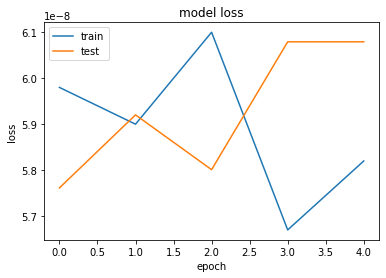

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
predict_dir_path = 'Downloads/dogs_vs_cats/test'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


In [18]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('Downloads/dogs_vs_cats/test/2.jpg', target_size=(img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image, batch_size=10)
train_generator.class_indices
if result[0][0] == 0:
    prediction = 'cat'
else:
    prediction = 'dog'
prediction

'dog'